In [ ]:
# Cell 1: Importy
import sys
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Dodanie katalogu src do ścieżki
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from data_generation import generate_ideal_data
from feature_engineering import normalize_data
from model_training import train_model, evaluate_model
from visualization import plot_distributions, plot_betas, plot_confusion_matrix, plot_roc_curve, plot_correlation_matrix, plot_feature_impact

In [10]:
# Cell 2: Generowanie danych
print("Generowanie danych idealnych...")
df, feature_names = generate_ideal_data()
X = df[feature_names].values
y = df['Target'].values

Generowanie danych idealnych...


In [11]:
# Cell 3: Podział i Normalizacja
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train, X_test, scaler = normalize_data(X_train_raw, X_test_raw)

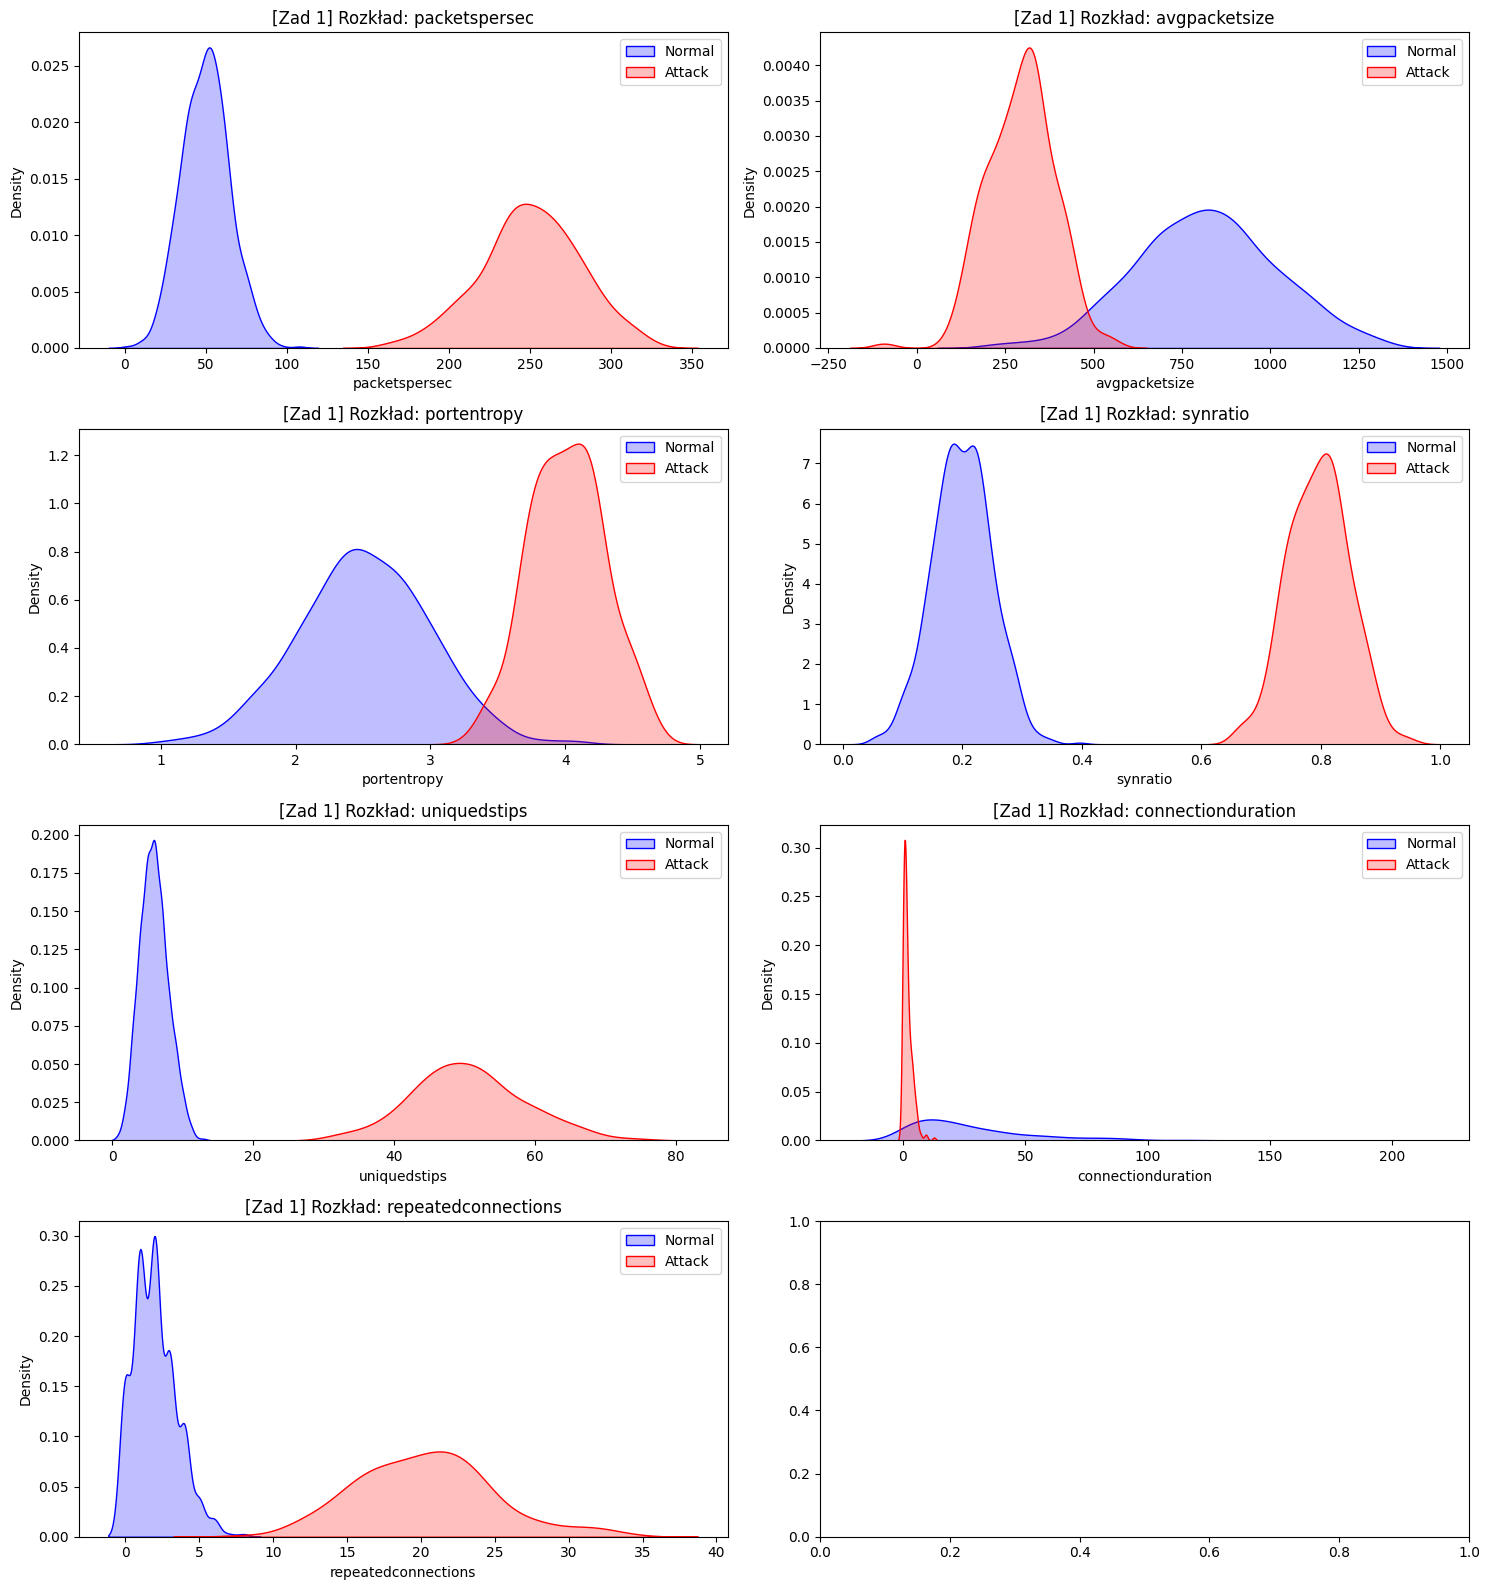

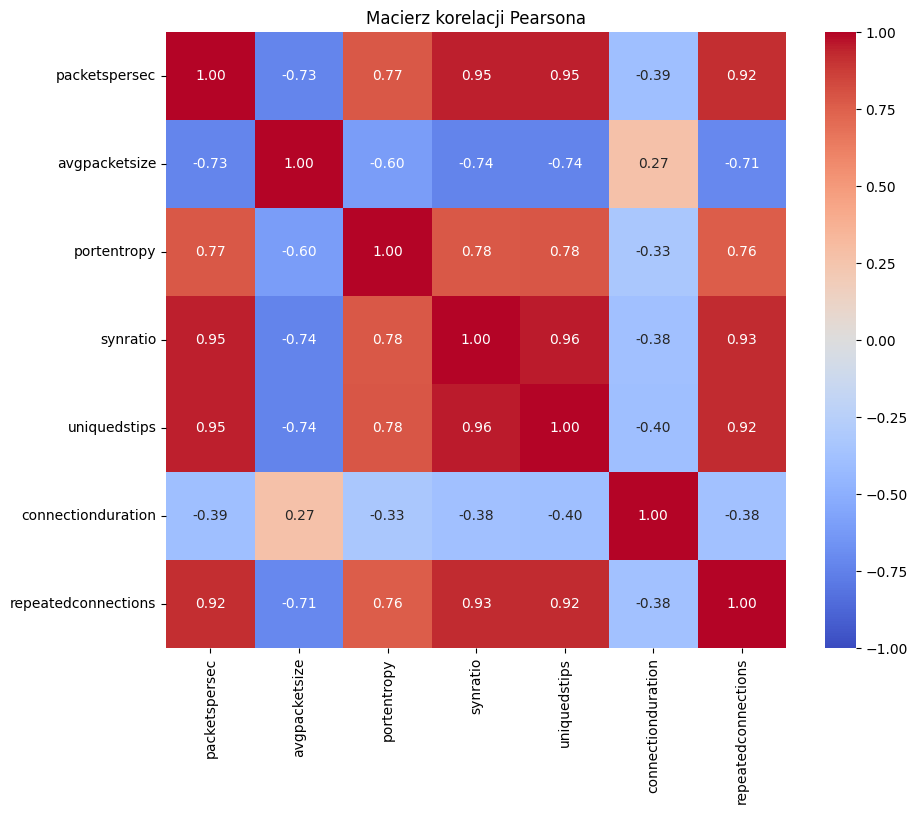

In [ ]:
# Cell 4: Wizualizacja Danych
plot_distributions(df, feature_names, title_prefix='[Zad 1]')
plot_correlation_matrix(df, feature_names)

In [13]:
# Cell 5: Trening Modelu
print("Trenowanie modelu...")
model = train_model(X_train, y_train, C=1.0)

Trenowanie modelu...


In [14]:
# Cell 6: Ewaluacja
metrics, y_pred, y_prob = evaluate_model(model, X_test, y_test)
print(f"Accuracy: {metrics['Accuracy']:.4f}")
print(f"F1 Score: {metrics['F1']:.4f}")
print(f"AUC:      {metrics['AUC']:.4f}")

Accuracy: 1.0000
F1 Score: 1.0000
AUC:      1.0000


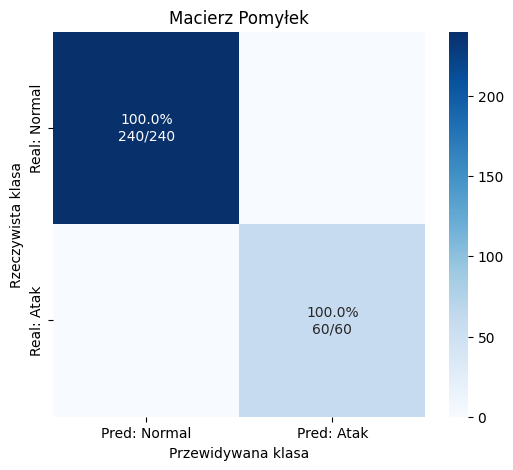

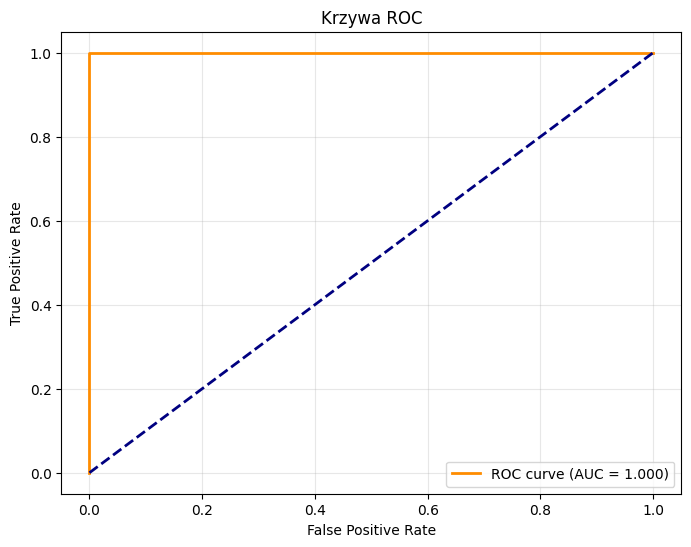

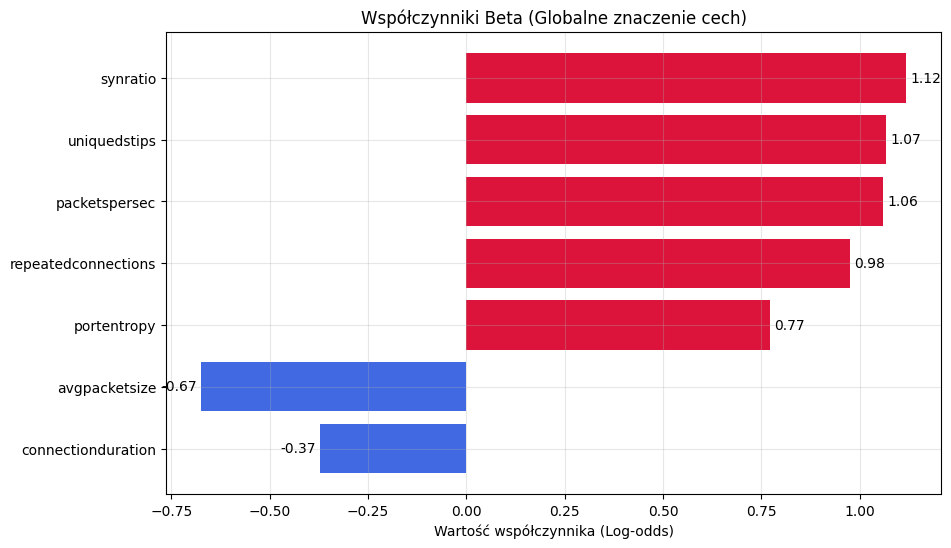

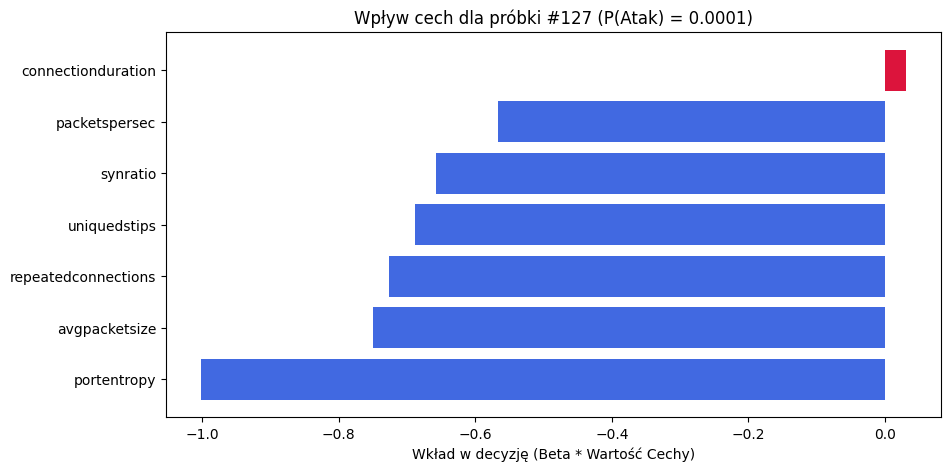

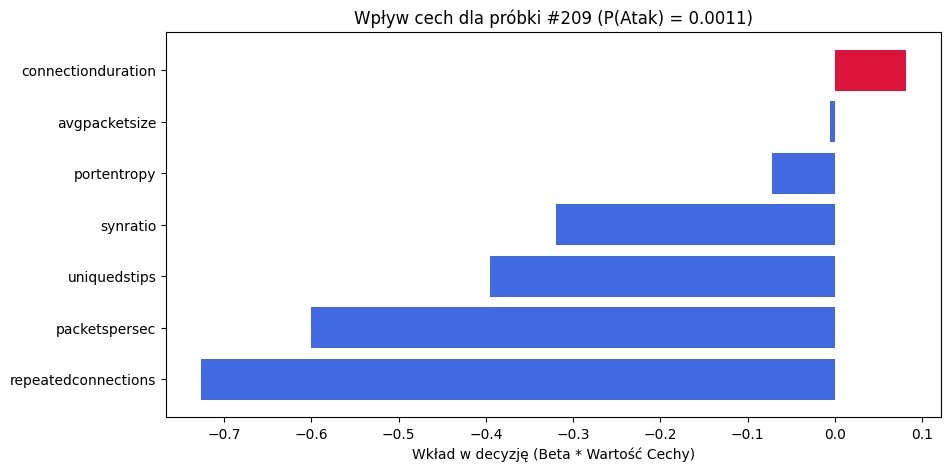

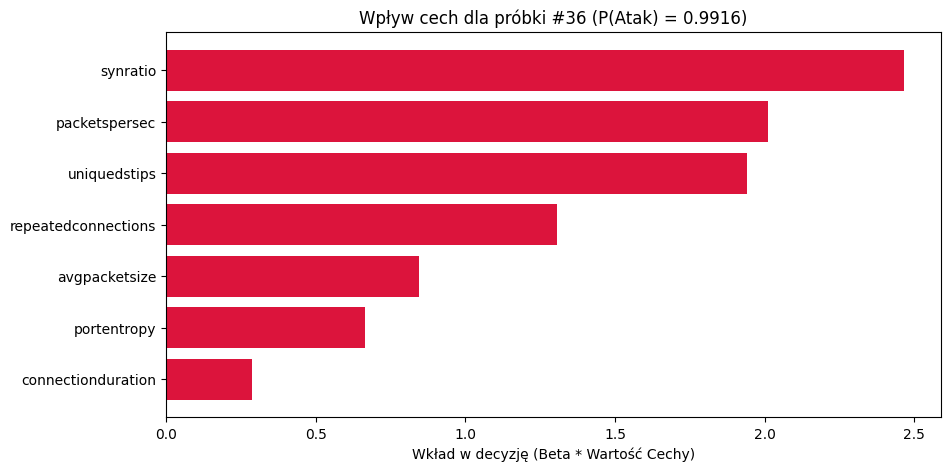

In [15]:
# Cell 7: Wizualizacja Wyników
plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(metrics)
plot_betas(model, feature_names)

# Analiza wpływu cech dla 3 losowych próbek ze zbioru testowego
import numpy as np
indices = np.random.choice(len(X_test), 3, replace=False)
for idx in indices:
    prob = y_prob[idx]
    plot_feature_impact(model, X_test, feature_names, sample_idx=idx, prediction_prob=prob)